In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn import tree

In [ ]:
import statsmodels.api as sm
from sklearn import metrics
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

## **Reading File**

In [ ]:
df = pd.read_csv('newfile.csv')

Preprocessing

Deleting unnecessary columns/data

In [ ]:
df.drop(columns=['oldoffencesubgroip'], inplace=True)

Replace negative values with zero

In [ ]:
# Specify the column for which you want to show only negative values
column_name = 'numberofoffences'

# Filtering only negative values from the specified column
negative_values_column = df[df[column_name] < 0]

In [ ]:
df = df[df['numberofoffences'] >= 0]

In [ ]:
df['numberofoffences'].describe()

count    247965.000000
mean        214.147852
std         851.849019
min           0.000000
25%           0.000000
50%           9.000000
75%          79.000000
max       29480.000000
Name: numberofoffences, dtype: float64

Checking negtive values after preprocessing

In [ ]:
negative_values_column = df[df['numberofoffences'] < 0]

In [ ]:
offence_count = df['offencegroup'].value_counts()

In [ ]:
force_count = df['forcename'].value_counts()

EDA

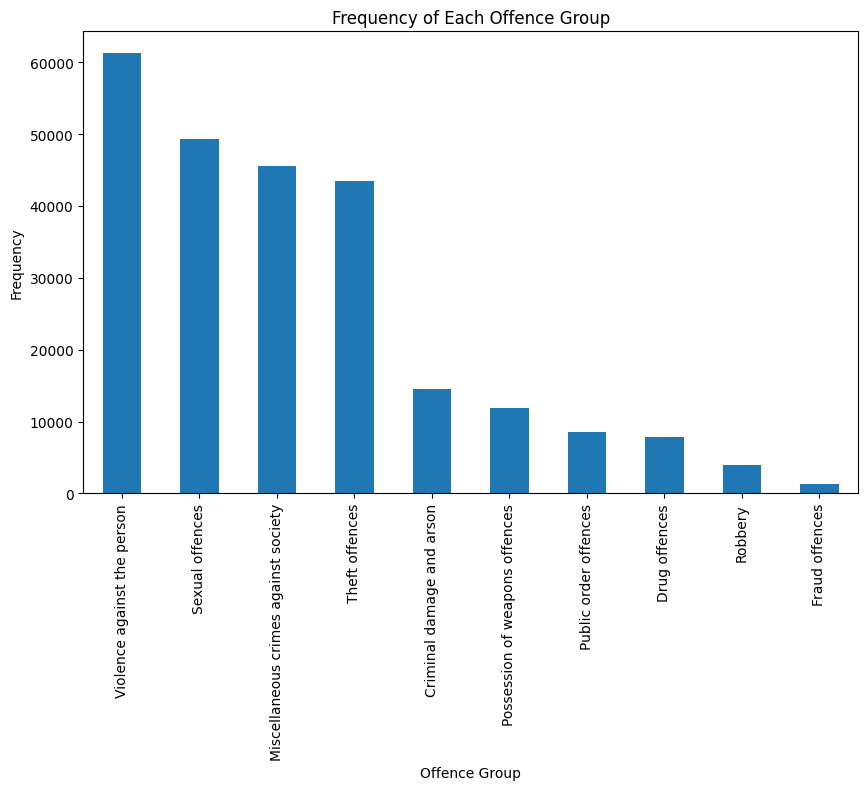

In [ ]:
plt.figure(figsize=(10, 6))
offence_count.plot(kind='bar')
plt.title('Frequency of Each Offence Group')
plt.xlabel('Offence Group')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [ ]:
force_count = df['forcename'].value_counts()

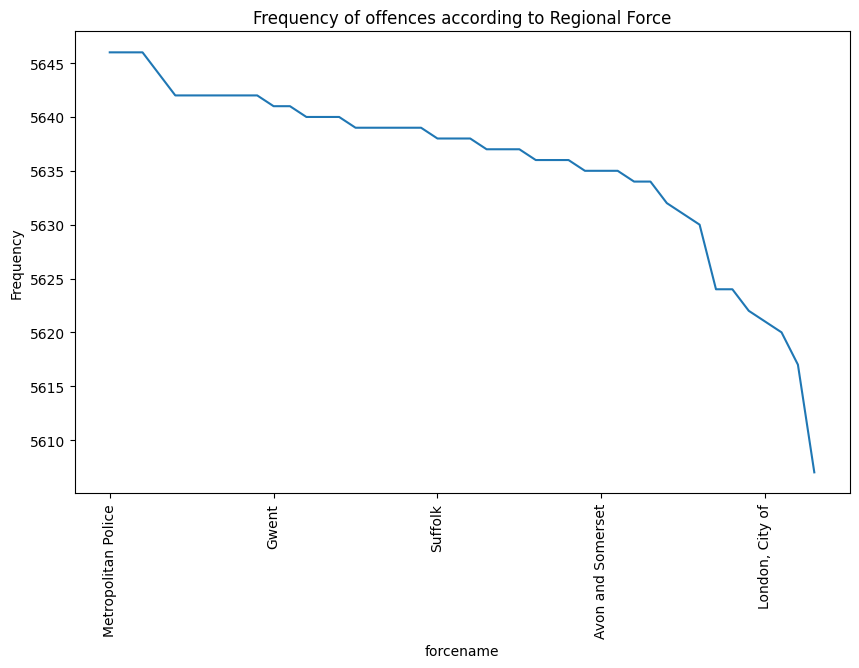

In [ ]:
plt.figure(figsize=(10, 6))
force_count.plot(kind='line')
plt.title('Frequency of offences according to Regional Force')
plt.xlabel('forcename')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [ ]:
for_scatter_plot = df[ ['forcename', 'numberofoffences', 'offencegroup']]

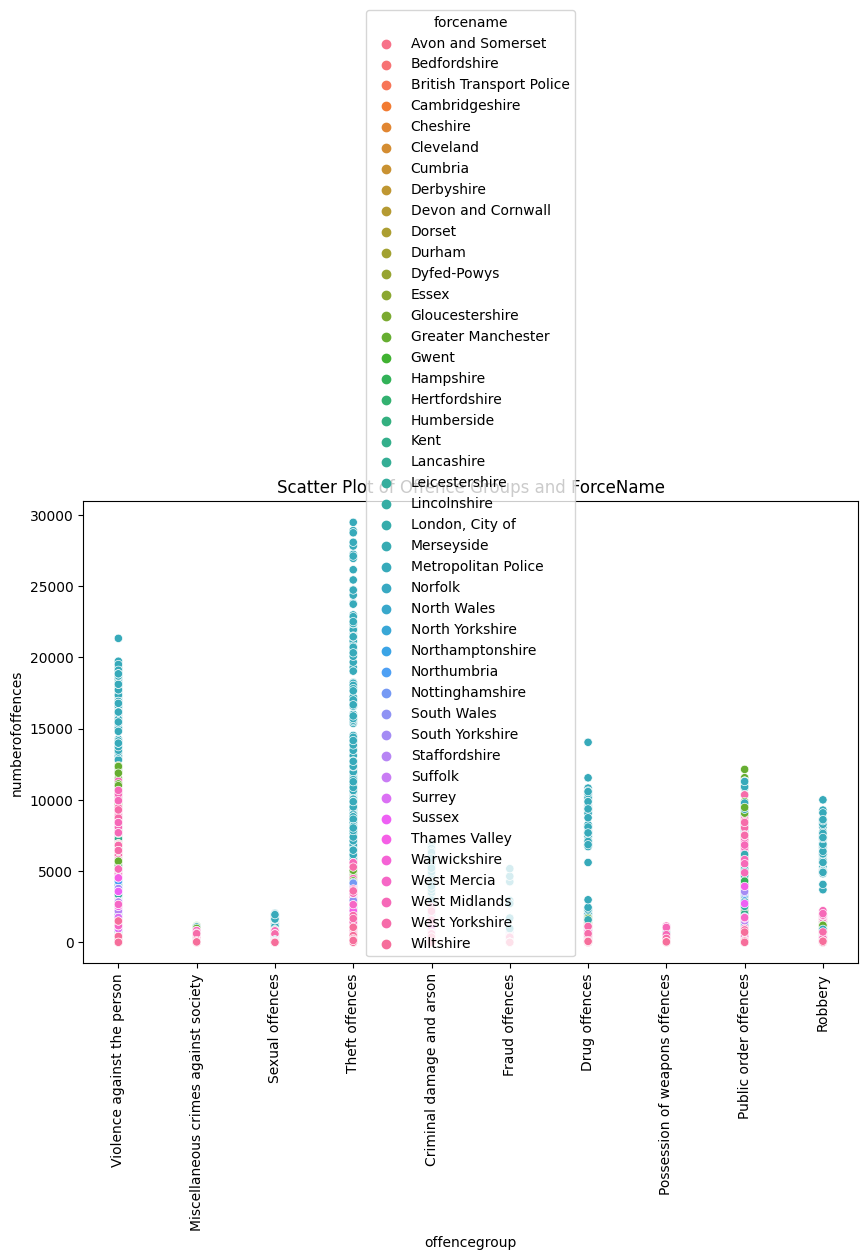

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=for_scatter_plot, x='offencegroup', y='numberofoffences', hue='forcename')
plt.xticks(rotation=90)
plt.title('Scatter Plot of Offence Groups and ForceName')
plt.show()

Slicing the data

In [ ]:
covid_condition= df[df['numberofoffences'] >= 9000]

In [ ]:
covid_condition.describe

<bound method NDFrame.describe of        financialyear  financialquarter            forcename  \
3588         2012/13                 1  Metropolitan Police   
3600         2012/13                 1  Metropolitan Police   
3654         2012/13                 1  Metropolitan Police   
3660         2012/13                 1  Metropolitan Police   
3697         2012/13                 1  Metropolitan Police   
...              ...               ...                  ...   
245844       2023/24                 1  Metropolitan Police   
247514       2023/24                 1        West Midlands   
247624       2023/24                 1       West Yorkshire   
248196       2023/24                 1  Metropolitan Police   
248197       2023/24                 1  Metropolitan Police   

                               offencedescription  \
3588                       Assault without injury   
3600                       Burglary in a dwelling   
3654                                  Other theft 

One Hot Encoding

In [ ]:
df_encoded= pd.get_dummies(covid_condition, columns=['offencecode'], prefix='offencecode')

In [ ]:
df_encoded= pd.get_dummies(covid_condition, columns=['financialyear'], prefix='financialyear')

In [ ]:
df_encoded = pd.get_dummies(covid_condition, columns=['forcename'], prefix='forcename')

Feature Selection

In [ ]:
covid_condition = covid_condition[['financialyear','financialquarter','forcename','offencecode','offencegroup','newonsoffencegroup','numberofoffences']]
covid_condition = covid_condition
X_DecisionTree = covid_condition.drop('offencegroup', axis=1)
Y_DecisionTree = covid_condition['forcename']

Dropping Anomalies (didn't have to encode here)

In [ ]:
#X_DecisionTree = pd.get_dummies(data=X_DecisionTree, drop_first=True)

Splitting Data

In [ ]:
X_train_DecisionTree, X_test_DecisionTree, Y_train_DecisionTree, Y_test_DecisionTree = train_test_split(X_DecisionTree, Y_DecisionTree, random_state=1)

Modelling

In [ ]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 50,max_depth=75, min_samples_split=9, min_samples_leaf=6)
clf_gini

DecisionTreeClassifier(max_depth=75, min_samples_leaf=6, min_samples_split=9,
                       random_state=50)

In [ ]:
clf_gini.fit(X_train_DecisionTree, Y_train_DecisionTree)

DecisionTreeClassifier(max_depth=75, min_samples_leaf=6, min_samples_split=9,
                       random_state=50)

In [ ]:
Y_Pred_DecisionTree = clf_gini.predict(X_test_DecisionTree)
Y_Pred_DecisionTree

array(['Devon and Cornwall', 'Thames Valley', 'Sussex',
       'Avon and Somerset', 'Hampshire', 'Metropolitan Police',
       'Metropolitan Police', 'Greater Manchester', 'Metropolitan Police',
       'Avon and Somerset', 'West Yorkshire', 'Metropolitan Police',
       'Avon and Somerset', 'Metropolitan Police', 'Lancashire', 'Kent',
       'Lancashire', 'Metropolitan Police', 'West Yorkshire',
       'Greater Manchester', 'West Yorkshire', 'Sussex',
       'Greater Manchester', 'Greater Manchester', 'West Yorkshire',
       'Metropolitan Police', 'West Yorkshire', 'Kent',
       'Greater Manchester', 'Kent', 'Metropolitan Police', 'Lancashire',
       'Greater Manchester', 'Metropolitan Police', 'West Midlands',
       'West Yorkshire', 'Kent', 'Kent', 'Greater Manchester',
       'Metropolitan Police', 'Merseyside', 'West Midlands',
       'West Yorkshire', 'Metropolitan Police', 'Northumbria',
       'Metropolitan Police', 'Essex', 'West Yorkshire', 'Leicestershire',
       'Greate

Metrics

In [ ]:
ac=accuracy_score(Y_test_DecisionTree, Y_Pred_DecisionTree)*100
ac

99.32249322493224

Plotting the Tree

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf_gini, out_file=None, feature_names=X_DecisionTree.columns, class_names=['0','1'])
graph = graphviz.Source(dot_data)
graph.render("crime")
graph

IndexError: list index out of range

Model Accuracy for Decision Tree: 0.9932249322493225


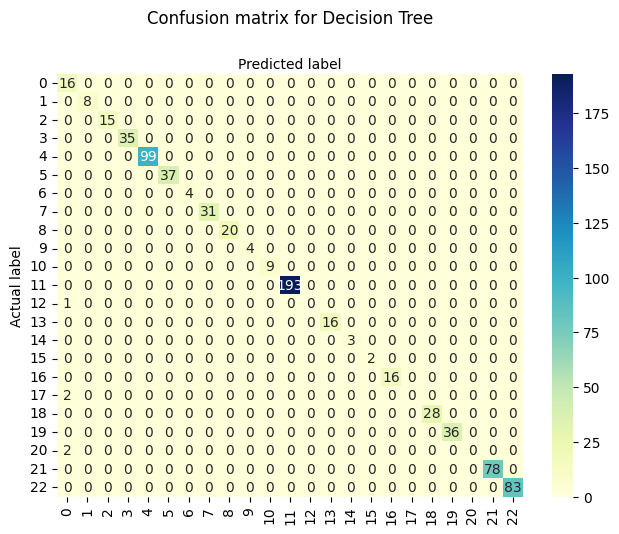

In [ ]:
# For Decision Tree
cnf_matrix_DecisionTree = metrics.confusion_matrix(Y_test_DecisionTree, Y_Pred_DecisionTree)
cnf_matrix_DecisionTree
# name  of classes
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_DecisionTree), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Decision Tree', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for Decision Tree:",metrics.accuracy_score(Y_test_DecisionTree, Y_Pred_DecisionTree))

In [ ]:
from sklearn. metrics import r2_score
print ("coefficient of determination:", r2_score(Y_test_DecisionTree, Y_Pred_DecisionTree))


ValueError: could not convert string to float: 'Devon and Cornwall'

In [ ]:
covid_condition.corr()

,financialquarter,numberofoffences
financialquarter,1.000000,0.000775
numberofoffences,0.000775,1.000000


Applying Gaussian NB classifier

Feature Selection

In [ ]:
X_NaiveBayes= covid_condition [['financialquarter', 'numberofoffences', 'financialyear']]
Y_NaiveBayes = covid_condition[['forcename']]

Checking array's dimensions

In [ ]:
X_NaiveBayes.shape


(408, 3)

In [ ]:
Y_NaiveBayes.shape

(408, 1)

Getting rid of anomalies after OHE

In [ ]:
X_NaiveBayes = pd.get_dummies(data=X_NaiveBayes, drop_first=True)

Splitting the dataset

In [ ]:
X_train_NaiveBayes, X_test_NaiveBayes, Y_train_NaiveBayes, Y_test_NaiveBayes = train_test_split(X_NaiveBayes, Y_NaiveBayes, test_size=0.2, random_state=1)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

Fitting the model

In [ ]:
model.fit(X_train_NaiveBayes, Y_train_NaiveBayes)

GaussianNB()

Prediction and accuracy

In [ ]:
Y_Pred_NaiveBayes = model.predict(X_test_NaiveBayes)


In [ ]:
print('Accuracy of Gaussian Naive Bayes classifier on test set: {:.2f}'.format(model.score(X_test_NaiveBayes, Y_test_NaiveBayes)))

Accuracy of Gaussian Naive Bayes classifier on test set: 0.67


Model Accuracy for Random Forest: 0.6707317073170732


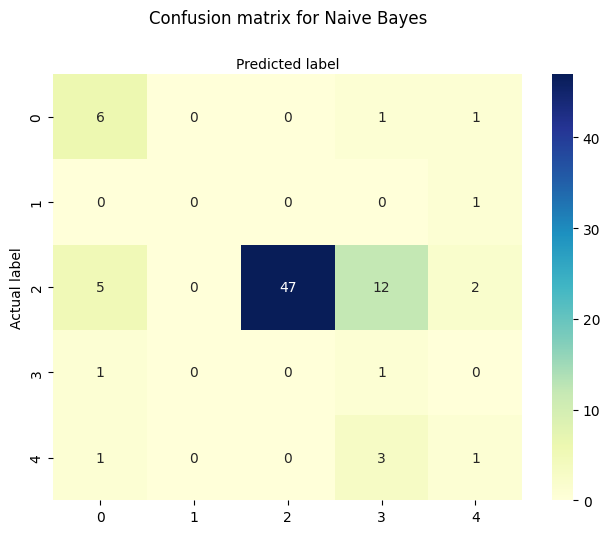

In [ ]:
cnf_matrix_NaiveBayes = metrics.confusion_matrix(Y_test_NaiveBayes, Y_Pred_NaiveBayes)
cnf_matrix_NaiveBayes
# name  of classes
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_NaiveBayes), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Naive Bayes', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for Random Forest:",metrics.accuracy_score(Y_test_NaiveBayes, Y_Pred_NaiveBayes))

In [ ]:
covid_condition.corr()

,financialquarter,numberofoffences
financialquarter,1.000000,-0.011983
numberofoffences,-0.011983,1.000000


In [ ]:
print ("coefficient of determination:", r2_score((Y_test_NaiveBayes, Y_Pred_NaiveBayes))

SyntaxError: incomplete input (<ipython-input-313-31603add1476>, line 1)